In [41]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


2/2 [==============================] - 0s 10ms/step


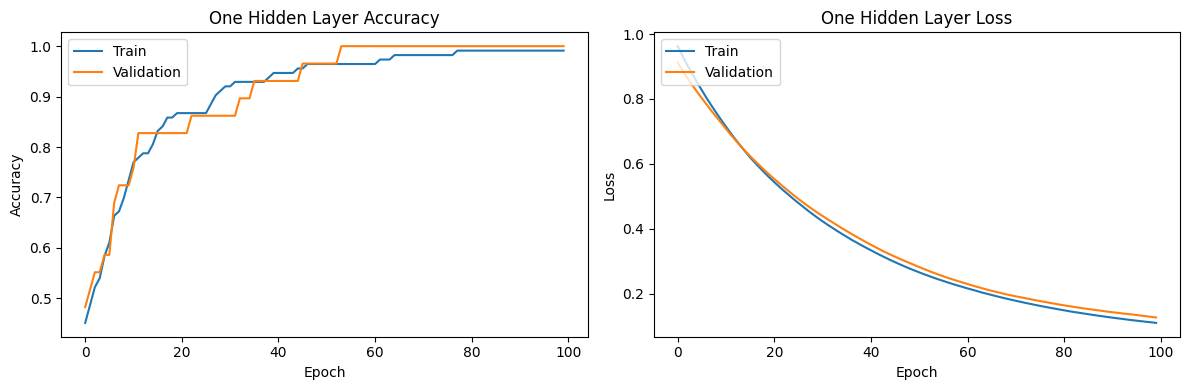

2/2 [==============================] - 0s 4ms/step


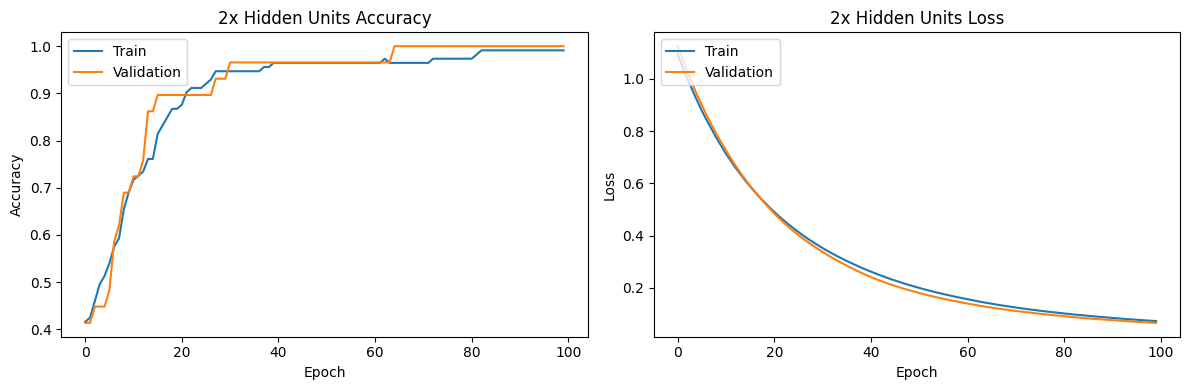

2/2 [==============================] - 0s 5ms/step


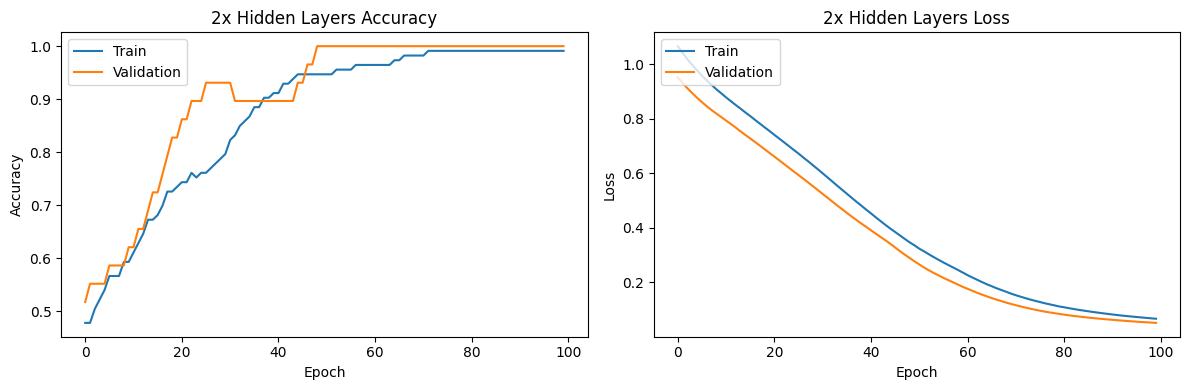

2/2 [==============================] - 0s 7ms/step


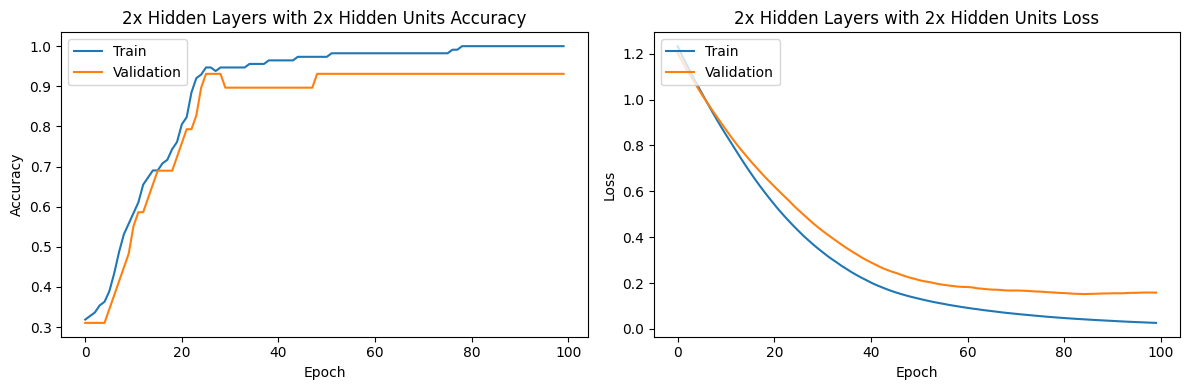

2/2 [==============================] - 0s 9ms/step


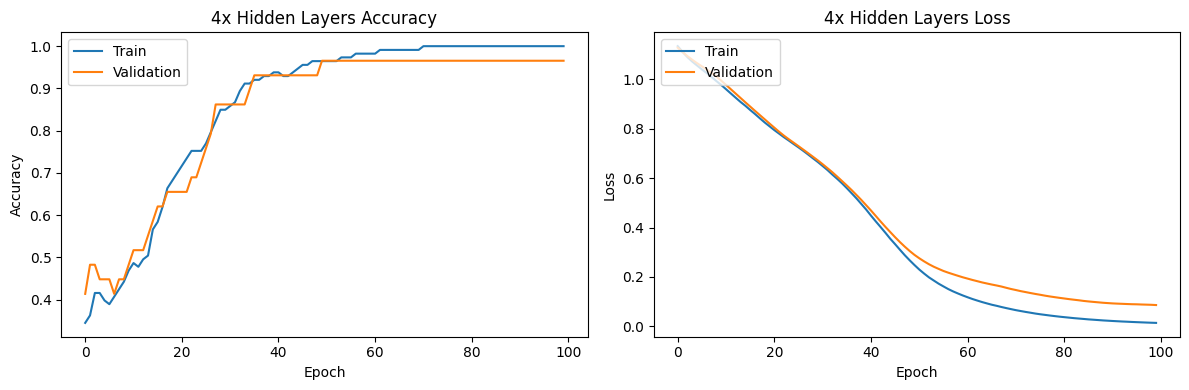

2/2 [==============================] - 0s 10ms/step


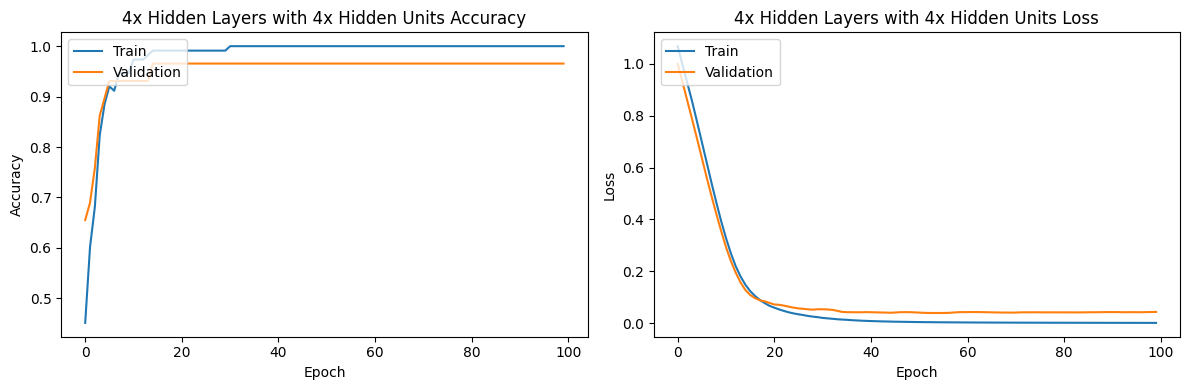

                              Experiment  Hidden Units  Hidden Layers  \
0                       One Hidden Layer             8              1   
1                        2x Hidden Units            16              1   
2                       2x Hidden Layers             8              2   
3  2x Hidden Layers with 2x Hidden Units            16              2   
4                       4x Hidden Layers             8              4   
5  4x Hidden Layers with 4x Hidden Units            32              4   

   Accuracy  
0  0.972222  
1  0.972222  
2  1.000000  
3  1.000000  
4  0.972222  
5  1.000000  


In [1]:
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Load the Wine dataset from scikit-learn
wine = load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define functions for creating and training models
def create_model(hidden_units=8, hidden_layers=1):
    model = Sequential()
    model.add(Dense(units=hidden_units, input_dim=X_train.shape[1], activation='relu'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(units=hidden_units, activation='relu'))
    model.add(Dense(units=len(np.unique(y)), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_and_evaluate(model, X_train, y_train, X_test, y_test, experiment_name):
    log_dir = os.path.join("logs", experiment_name)
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0,
                        validation_split=0.2, callbacks=[tensorboard_callback])

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_classes)
    classification_rep = classification_report(y_test, y_pred_classes, target_names=wine.target_names)

    return accuracy, history, classification_rep

def plot_history(history, title="Model Training"):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Conduct experiments
experiments = {
    "One Hidden Layer": {"hidden_units": 8, "hidden_layers": 1},
    "2x Hidden Units": {"hidden_units": 16, "hidden_layers": 1},
    "2x Hidden Layers": {"hidden_units": 8, "hidden_layers": 2},
    "2x Hidden Layers with 2x Hidden Units": {"hidden_units": 16, "hidden_layers": 2},
    "4x Hidden Layers": {"hidden_units": 8, "hidden_layers": 4},
    "4x Hidden Layers with 4x Hidden Units": {"hidden_units": 32, "hidden_layers": 4}
}

results = {}

for experiment, params in experiments.items():
    model = create_model(**params)
    accuracy, history, classification_rep = train_and_evaluate(model, X_train, y_train, X_test, y_test, experiment)
    results[experiment] = {"Accuracy": accuracy, "History": history, "Report": classification_rep}

    # Plot training/validation accuracy and loss
    plot_history(history, title=experiment)

# Summarize results in table format
summary = pd.DataFrame({
    "Experiment": list(results.keys()),
    "Hidden Units": [params["hidden_units"] for params in experiments.values()],
    "Hidden Layers": [params["hidden_layers"] for params in experiments.values()],
    "Accuracy": [result["Accuracy"] for result in results.values()]
})

print(summary)
